In [532]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load the dataset into python environment


In [533]:
data = pd.read_csv("titanic_dataset.csv")

In [534]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [535]:
data.set_index("PassengerId", inplace = True)

In [536]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [537]:
data.shape

(891, 11)

#### Dataset has 891 rows and 11 columns.

In [538]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Info function gives information about different data types present in the dataset.It has 11 columns in all with three different datatypes. This give the basic information about the dataset.

In [539]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### This is used to check any missing values present in the dataset.177 missing values are present in Age column.687 missing values in Cabin column.2 missing values in Embarked column.

In [540]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### Dtype is used to check datatypes of the column. In Titanic dataset, both numerical and categorical variables are present.

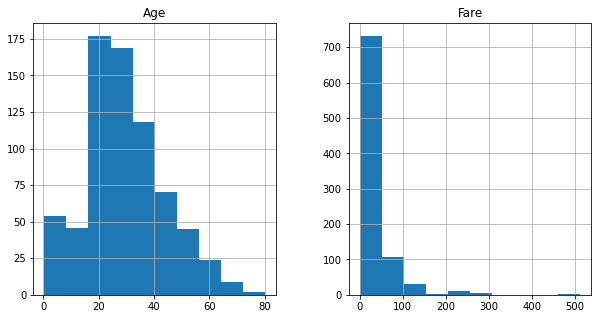

In [541]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

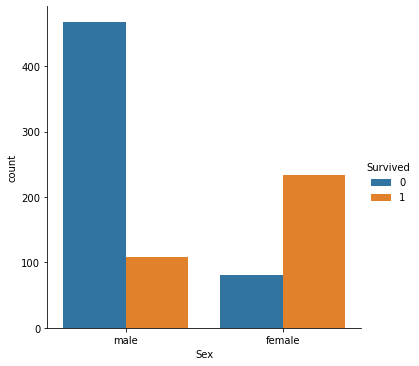

In [549]:
sns.catplot(x="Sex", hue="Survived",kind="count", data = data)

#### From the above graph, it can be concluded that the survival rate of women is more than that of survival rate of men.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

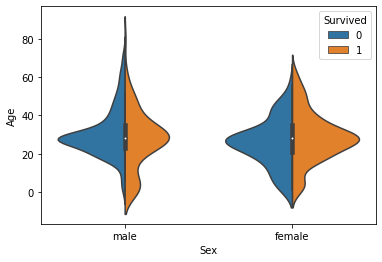

In [550]:
sns.violinplot(x = "Sex", y ="Age", hue="Survived", data=data, split = True)

#### Violinplot displays distribution of data across all levels of a category

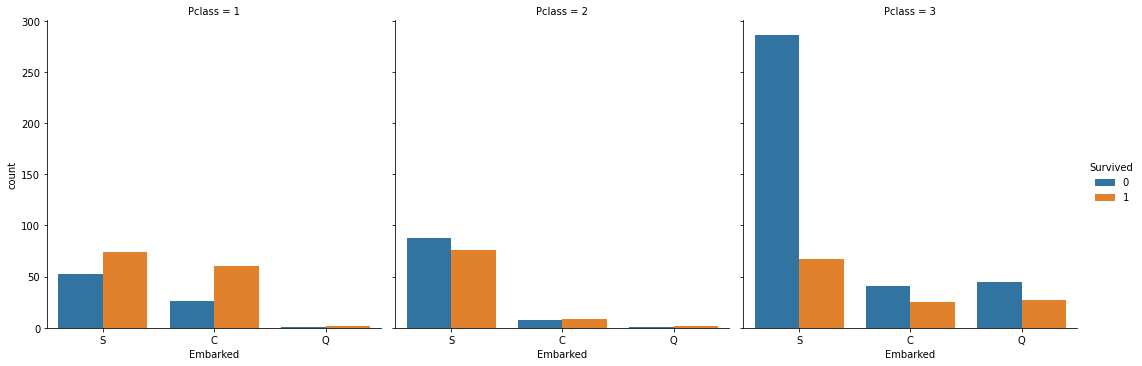

In [551]:
sns.catplot(x ='Embarked', hue = 'Survived', kind = 'count', col='Pclass', data=data)

#### It is observed that majority of paasengers boarded from S.


In [543]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### The columns having null values are Age,Cabin and Embarked. They need to be filled up with appropriate vlaues.

# 4. Fill in all the missing values present in all the columns in the dataset

In [544]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [545]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [546]:
# replacing missing values 
data["Cabin"].fillna( method ='ffill', inplace = True)
data["Embarked"].fillna( method ='ffill', inplace = True)

In [547]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64

In [462]:
data['Cabin'].value_counts()

G6             24
B78            21
C78            20
C83            19
C23 C25 C27    19
               ..
C46             1
B79             1
F G63           1
A5              1
C106            1
Name: Cabin, Length: 147, dtype: int64

In [463]:
data["Cabin"].fillna( 'E36', inplace = True)

In [464]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5.Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Age')

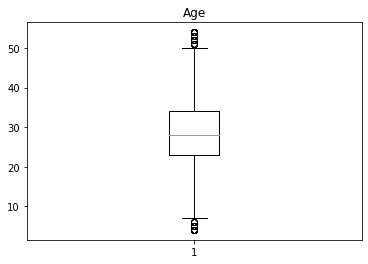

In [580]:
plt.boxplot(data['Age'])
plt.title('Age')

In [582]:
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1- 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [583]:
outlier = []
for x in data['Age']:
    if(x>up_lim) or (x < low_lim):
        outlier.append(x)

In [587]:
outlier

[54.0,
 4.0,
 5.0,
 4.0,
 54.0,
 51.0,
 51.0,
 4.0,
 4.0,
 51.0,
 5.0,
 54.0,
 52.0,
 54.0,
 51.0,
 4.0,
 5.0,
 52.0,
 54.0,
 54.0,
 53.0,
 54.0,
 52.0,
 4.0,
 51.0,
 4.0,
 52.0,
 52.0,
 6.0,
 4.0,
 6.0,
 51.0,
 54.0,
 5.0,
 6.0,
 52.0,
 4.0,
 51.0,
 4.0]

In [588]:
ind1 = data['Age']>up_lim
data.loc[ind1].index

Int64Index([  7, 125, 151, 156, 223, 250, 263, 318, 407, 450, 497, 514, 572,
            583, 592, 632, 696, 715, 766, 775, 821, 858],
           dtype='int64', name='PassengerId')

In [589]:
data.drop([ 7, 125, 151, 156, 223, 250, 263, 318, 407, 450, 497, 514, 572,
            583, 592, 632, 696, 715, 766, 775, 821, 858],inplace = True)

Text(0.5, 1.0, 'Age')

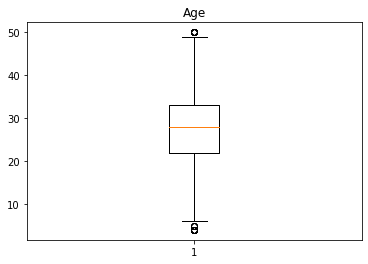

In [590]:
plt.boxplot(data['Age'])
plt.title('Age')

#### Outliers are reduced.

Text(0.5, 1.0, 'Fare')

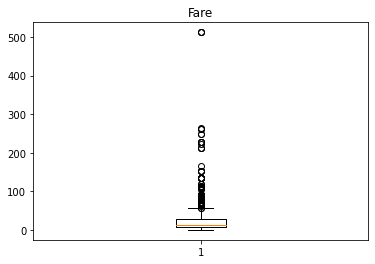

In [600]:
plt.boxplot(data['Fare'])
plt.title('Fare')

In [628]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1- 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [629]:
print(low_lim)
print(up_lim)

-4.6605000000000025
28.556300000000004


In [602]:
outlier2 = []
for x in data['Fare']:
    if(x>up_lim) or (x < low_lim):
        outlier2.append(x)

In [603]:
outlier2

[61.175,
 77.2875,
 247.5208,
 73.5,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 151.55,
 86.5,
 108.9,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5]

In [604]:
ind3 = data['Fare'] > up_lim
data.loc[ind3].index

Int64Index([ 93, 103, 119, 121, 140, 152, 160, 181, 202, 216, 219, 225, 231,
            246, 257, 258, 259, 270, 291, 292, 300, 307, 308, 311, 312, 319,
            320, 325, 326, 330, 333, 335, 337, 338, 342, 370, 374, 376, 378,
            381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 499, 505, 506,
            521, 524, 528, 538, 541, 545, 551, 558, 559, 582, 586, 610, 616,
            628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717,
            731, 738, 742, 743, 755, 760],
           dtype='int64', name='PassengerId')

In [605]:
data.drop([ 93, 103, 119, 121, 140, 152, 160, 181, 202, 216, 219, 225, 231,
            246, 257, 258, 259, 270, 291, 292, 300, 307, 308, 311, 312, 319,
            320, 325, 326, 330, 333, 335, 337, 338, 342, 370, 374, 376, 378,
            381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 499, 505, 506,
            521, 524, 528, 538, 541, 545, 551, 558, 559, 582, 586, 610, 616,
            628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717,
            731, 738, 742, 743, 755, 760],inplace = True)

Text(0.5, 1.0, 'Fare')

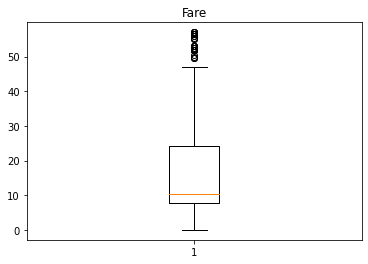

In [606]:
plt.boxplot(data['Fare'])
plt.title('Fare')

In [607]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1- 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [608]:
outlier3 = []
for x in data['Fare']:
    if(x>up_lim) or (x < low_lim):
        outlier3.append(x)

In [609]:
outlier3

[53.1,
 52.0,
 56.4958,
 52.0,
 53.1,
 55.0,
 56.4958,
 50.0,
 52.5542,
 56.9292,
 55.0,
 55.4417,
 52.0,
 55.9,
 51.8625,
 52.0,
 56.4958,
 49.5,
 55.9,
 56.9292,
 52.5542,
 56.4958,
 52.0,
 52.0,
 57.0,
 56.4958,
 49.5042,
 52.0,
 53.1,
 53.1,
 57.0,
 53.1,
 56.4958,
 56.4958,
 50.4958,
 52.5542]

In [610]:
ind4 = data['Fare'] > up_lim
data.loc[ind4].index

Int64Index([  4,  36,  75, 111, 138, 167, 170, 186, 249, 310, 357, 371, 384,
            435, 458, 476, 510, 540, 578, 600, 622, 644, 670, 672, 691, 693,
            711, 713, 725, 749, 782, 810, 827, 839, 868, 872],
           dtype='int64', name='PassengerId')

In [611]:
data.drop([ 4,  36,  75, 111, 138, 167, 170, 186, 249, 310, 357, 371, 384,
            435, 458, 476, 510, 540, 578, 600, 622, 644, 670, 672, 691, 693,
            711, 713, 725, 749, 782, 810, 827, 839, 868, 872],inplace = True)

Text(0.5, 1.0, 'Fare')

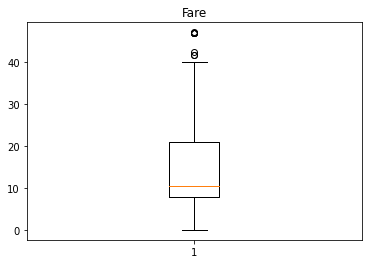

In [612]:
plt.boxplot(data['Fare'])
plt.title('Fare')

In [613]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1- 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [614]:
outlier4 = []
for x in data['Fare']:
    if(x>up_lim) or (x < low_lim):
        outlier4.append(x)

In [615]:
outlier4

[46.9, 46.9, 47.1, 46.9, 42.4, 41.5792, 46.9, 46.9, 41.5792]

In [616]:
ind4= data['Fare']>39
data.loc[ind4].index

Int64Index([51, 60, 72, 84, 267, 481, 557, 584, 603, 609, 639, 679, 684, 686,
            687, 767, 854],
           dtype='int64', name='PassengerId')

In [617]:
data.drop([ 51, 60, 72, 84, 267, 481, 557, 584, 603, 609, 639, 679, 684, 686,
            687, 767, 854],inplace = True)

Text(0.5, 1.0, 'Fare')

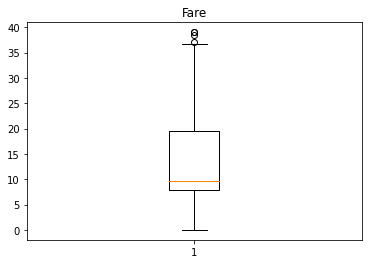

In [618]:
plt.boxplot(data['Fare'])
plt.title('Fare')

#### Outliers of Fare column are also reduced.

Text(0.5, 1.0, 'No: of Siblings or spouse on board')

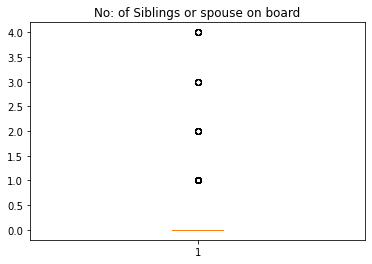

In [619]:
plt.boxplot(data['SibSp'])
plt.title('No: of Siblings or spouse on board')

#### Presence of outliers in the SibSb column.It can be handled by finding quartile values.

In [620]:
Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1- 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [621]:
outlier5 = []
for x in data['SibSp']:
    if(x>up_lim) or (x < low_lim):
        outlier5.append(x)

In [622]:
outlier5

[1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 4,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 3,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 4,
 1,
 3,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1]

In [623]:
ind5 = data['SibSp']>1
data.loc[ind5].index

Int64Index([ 25,  39,  49,  64,  69,  70,  86, 105, 148, 172, 177, 183, 230,
            234, 279, 302, 331, 334, 393, 410, 437, 438, 449, 486, 530, 542,
            543, 566, 601, 619, 635, 727, 788, 814, 820, 851, 861],
           dtype='int64', name='PassengerId')

In [625]:
data.drop([ 25,  39,  49,  64,  69,  70,  86, 105, 148, 172, 177, 183, 230,
            234, 279, 302, 331, 334, 393, 410, 437, 438, 449, 486, 530, 542,
            543, 566, 601, 619, 635, 727, 788, 814, 820, 851, 861],inplace = True)

Text(0.5, 1.0, 'No: of Siblings or spouse on board')

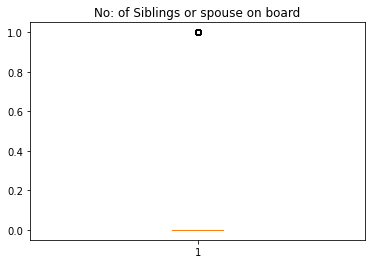

In [626]:
plt.boxplot(data['SibSp'])
plt.title('No: of Siblings or spouse on board')

#### Outliers are reduced.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [630]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [631]:
data.shape

(603, 11)

In [632]:
data.drop(['Name','Ticket','Cabin'], axis=1, inplace=True) 
#df.drop(['Apps','Accept'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q
9,1,3,female,27.0,0,2,11.1333,S


In [633]:
data.shape

(603, 8)

#### One Hot Encoding

In [634]:
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0
9,1,3,27.0,0,2,11.1333,1,0,0,0,1


<AxesSubplot:>

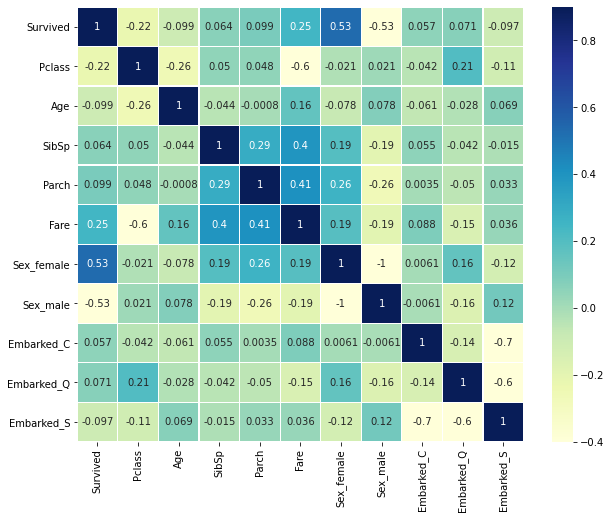

In [635]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [506]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [636]:
data.shape

(603, 11)

In [637]:
y = data['Survived']#target
x = data.drop('Survived', axis = 1)#features

In [638]:
# spiltting into testing and training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [639]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [640]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 0.14087945427317394


In [641]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,predictions))

R squared value is : 0.33635260939075284


In [642]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,603.000000,603.00000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2.593698,28.13267,0.199005,0.235489,13.332074,0.303483,0.696517,0.144279,0.109453,0.746269
std,0.638541,8.53665,0.399583,0.694736,8.149316,0.460143,0.460143,0.351664,0.312466,0.435507
min,1.000000,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.00000,0.000000,0.000000,7.795800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.00000,0.000000,0.000000,9.225000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,32.00000,0.000000,0.000000,16.100000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,50.00000,1.000000,5.000000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [643]:
type(x)

pandas.core.frame.DataFrame

In [644]:
from sklearn import preprocessing

#### Instance is stored into standard scaling variable. 

#### StandardScaler is present in the preprocessing class of sklearn.

In [646]:
standardisation = preprocessing.StandardScaler()
x = standardisation.fit_transform(x)

In [647]:
x.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [648]:
x = pd.DataFrame(x)

#### x is a dataframe. It is converted to numpy arrary. It must be again converted to dataframe.

In [649]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02,6.030000e+02
mean,-1.097335e-16,4.391181e-17,-6.167906e-17,-1.377192e-16,-1.086288e-17,8.432540e-17,-8.432540e-17,-1.564991e-16,5.302558e-17,-9.353123e-17
std,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00,1.000830e+00
min,-2.497916e+00,-2.829295e+00,-4.984448e-01,-3.392434e-01,-1.637333e+00,-6.600866e-01,-1.514953e+00,-4.106150e-01,-3.505781e-01,-1.714986e+00
25%,-9.305453e-01,-6.017502e-01,-4.984448e-01,-3.392434e-01,-6.799185e-01,-6.600866e-01,-1.514953e+00,-4.106150e-01,-3.505781e-01,-1.714986e+00
50%,6.368257e-01,-1.555413e-02,-4.984448e-01,-3.392434e-01,-5.043962e-01,-6.600866e-01,6.600866e-01,-4.106150e-01,-3.505781e-01,5.830952e-01
75%,6.368257e-01,4.534028e-01,-4.984448e-01,-3.392434e-01,3.399333e-01,1.514953e+00,6.600866e-01,-4.106150e-01,-3.505781e-01,5.830952e-01
max,6.368257e-01,2.563709e+00,2.006240e+00,6.863706e+00,3.152318e+00,1.514953e+00,6.600866e-01,2.435372e+00,2.852431e+00,5.830952e-01


In [650]:
#create linear regression model 
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is',mean_squared_error(y_test,predictions))
print('R squared value is :', r2_score(y_test,predictions))

MSE is 0.14063305386091784
R squared value is : 0.3375133392607148


#### R squared value is the same which means that Standard scaling has not done any effect on this dataset. So have to do Min Max Scaling on the dataset.

In [651]:
x = data.drop('Survived', axis = 1)#features

In [652]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,603.000000,603.00000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2.593698,28.13267,0.199005,0.235489,13.332074,0.303483,0.696517,0.144279,0.109453,0.746269
std,0.638541,8.53665,0.399583,0.694736,8.149316,0.460143,0.460143,0.351664,0.312466,0.435507
min,1.000000,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.00000,0.000000,0.000000,7.795800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.00000,0.000000,0.000000,9.225000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,32.00000,0.000000,0.000000,16.100000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,50.00000,1.000000,5.000000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [653]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [654]:
x = min_max.fit_transform(x)

In [655]:
x = pd.DataFrame(x)

In [656]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,0.796849,0.524623,0.199005,0.047098,0.341848,0.303483,0.696517,0.144279,0.109453,0.746269
std,0.319270,0.185579,0.399583,0.138947,0.208957,0.460143,0.460143,0.351664,0.312466,0.435507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.413043,0.000000,0.000000,0.199892,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.521739,0.000000,0.000000,0.236538,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.608696,0.000000,0.000000,0.412821,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [657]:
#create linear regression model 
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is',mean_squared_error(y_test,predictions))
print('R squared value is :', r2_score(y_test,predictions))

MSE is 0.140837768385233
R squared value is : 0.3365489810398339


In [659]:
data.shape


(603, 11)